In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
# Read CSV files
contracts = pd.read_csv('contracts')
cryield = pd.read_csv('cryield')
customers = pd.read_csv('customers')
locations = pd.read_csv('locations')

In [3]:
testcryield = cryield

In [5]:
testcryield.head(6)

,cust_id,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count
0,202802,50339,0.500000,1,grp_msg,Hurmat,2019-12-31,connected,3.0,6.0,8.0,very poor,3/4,drought before flowering,45.0,6.0,130.0,"Four days after the fertilizer application, th...",216.0
1,206328,49794,0.153005,2,grp_none,Hurmat,2019-12-31,connected,3.0,NaN,0.0,good,none,other,20.0,0.0,0.0,"I am still harvesting, so i can't tell the num...",95.0
2,206340,49809,0.153005,2,grp_none,Hurmat,2019-12-24,failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
3,206378,49919,0.153005,2,grp_none,Hurmat,2019-12-24,connected,NaN,1.5,0.0,good,none,other,6.0,0.0,0.0,For feeding,1.0
4,205665,47411,0.153005,2,grp_none,Hurmat,2019-12-31,connected,2.0,8.0,0.0,average,1/2,other,18.0,5.0,110.0,NaN,2.0
5,205154,49881,0.153005,2,grp_none,Hurmat,2019-12-24,connected,3.0,4.5,9.0,very poor,all,excess rain,45.0,2.0,120.0,NaN,NaN


In [6]:
# Selecting only season 2 2019
season2 = customers

In [7]:
season2.head()

,cust_id,date_reg,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd
0,145990,2017-09-25,F,none,NaN,NaN,Y2018S1,VISIT,True,True,False,Customer,0.944205
1,145981,2017-09-25,M,none,NaN,NaN,Y2018S1,VISIT,True,True,False,Customer,11.330460
2,154770,2018-01-04,NaN,NaN,NaN,NaN,Y2018S1,CALL CENTER,True,True,False,Ambassador,8.497845
3,186624,2018-05-11,NaN,NaN,NaN,NaN,Y2018S1,CALL CENTER,True,True,False,Customer,3.776820
4,185093,2018-04-28,NaN,NaN,NaN,NaN,Y2018S1,VISIT,False,NaN,False,Customer,0.944205


In [49]:
# Join customers crop yield table using left join and selecting on calls that connected and 2019 season 
cust_cropyld = pd.merge(season2, testcryield, on='cust_id', how='left')
cust_cropyld = cust_cropyld[cust_cropyld['call_status']=='connected']
cust_cropyld = cust_cropyld[(cust_cropyld['cht_season']=='Y2019S2') | (cust_cropyld['cht_season']=='Y2019S1')]
cust_cropyld.shape

(72, 31)

In [ ]:
cust_cropyld

In [51]:
# Merget contracts table and also location table
contract_loc = pd.merge(contracts, locations, on='loc_id', how='left')
contract_loc.shape

(2281, 30)

In [52]:
# Join two tables above to get a full table containing information needed for the analyis
full_table = pd.merge(cust_cropyld, contract_loc, on='cntr_id')
full_table.head(2)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283
1,206068,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,1.888410,48871.0,0.152239,8.0,grp_none,Faa-Ilatu,2020-01-08,connected,4.0,37.0,10.0,very poor,none,other,37.0,0.0,0.0,NaN,NaN,206068.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,10.0,1.888410,2019-06-29,2019-06-29,2019-08-19,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283


In [279]:
full_table.shape

(72, 63)

### Total records on full table is 72

In [54]:
# Define function to calculate yield in Kgs

def acre_calc(data):
    if data['product_code']=='MAIZ-GHA-20-ST01':
        maize_weight = 100
        size = (data['yield_bags'] * maize_weight)
        
    elif data['product_code']=='GROU-GHA-20-ST01':
        groundnut_weight = 82
        size =  (data['yield_bags'] * groundnut_weight)
        
    elif data['product_code']=='RICE-GHA-20-ST01':
        rice_weight = 100
        size =  (data['yield_bags'] * rice_weight)
        
    elif data['product_code']=='SORG-GHA-20-ST01':
        sorg_weight = 100
        size =  (data['yield_bags'] * sorg_weight)
    
    return size

In [55]:
# Apply function to the table in order to get the yield in Kg

full_table['yield in kg'] = full_table.apply(acre_calc, axis=1)
full_table.head(10)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,164.0
1,206068,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,1.888410,48871.0,0.152239,8.0,grp_none,Faa-Ilatu,2020-01-08,connected,4.0,37.0,10.0,very poor,none,other,37.0,0.0,0.0,NaN,NaN,206068.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,10.0,1.888410,2019-06-29,2019-06-29,2019-08-19,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,3700.0
2,206287,2019-01-29,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.832615,49530.0,0.152239,8.0,grp_none,Alhassan,2019-12-24,connected,6.0,8.0,0.0,poor,1/4,no fertilizer,21.0,0.0,0.0,Pets affected small part of the farm.,NaN,206287.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2019-01-29,10.0,1.888410,2019-07-06,2019-07-06,2019-08-01,2467,0.0,0.000000,NaN,Jukuku,1970-01-01T05:04:09Z,NaN,NaN,NaN,NaN,254.557668,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.020787,9.140628,800.0
3,206316,2019-02-22,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,NaN,False,Customer,1.888410,49726.0,0.155080,7.0,grp_msg,Faa-Ilatu,2020-01-08,connected,2.0,4.0,4.0,poor,1/4,drought after flowering,20.0,0.0,0.0,NaN,NaN,206316.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2019-03-21,10.0,1.888410,2019-06-30,2019-06-30,2019-08-30,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,400.0
4,206075,2018-12-18,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,4.721025,48885.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-31,connected,10.0,67.0,0.0,average,1/2,drought after flowering,115.0,0.0,0.0,NaN,NaN,206075.0,paid out,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,20.0,3.776820,2019-05-10,2019-05-10,2019-07-23,528,40.0,7.553640,True,Takpili,1970-01-01T04:58:45Z,NaN,NaN,NaN,NaN,115.948374,NaN,GH(N),Ghana,GH-NP,5,East Gonja,-0.578411,9.300931,6700.0
5,160265,2017-12-08,M,none,5.0,2.0,Y2019S1,CALL CENTER,True,True,False,Customer,7.553640,49421.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,8.0,11.0,4.0,average,1/3,drought after flowering,0.0,0.0,0.0,"Yield is not enough, hence is for consumption ...",NaN,160265.0,paid out,Y2019S1,MAIZ-GHA-20-ST01,2019-01-30,20.0,3.776820,2019-06-09,2019-06-09,2019-06-09,173,32.0,6.042912,True,Dakpemyili,1970-01-01T05:00:10Z,NaN,NaN,NaN,NaN,240.205752,NaN,GH(N),Ghana,GH-NP,5,East Gonja,-0.879270,9.301770,1100.0
6,206534,2019-05-28,M,NaN,NaN,NaN,Y2019S1,USSD (CA),True,NaN,False,Customer,3.776820,50259.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-31,connected,4.0,17.0,2.0,average,2/3,no fertilizer,24.0,0.0,0.0,Pets and disease also affect some parts of the...,NaN,206534.0,paid out,Y2019S1,MAIZ-GHA-20-ST01,2019-05-28,20.0,3.776820,2019-07-04,2019-07-04,2019-08-26,859,30.0,5.665230,True,Samang,1970-01-01T05:00:54Z,NaN,NaN,NaN,NaN,189.218682,NaN,GH(N),Ghana,GH-NP,7,Gushegu,-0.393208,9.806972,1700.0
7,206524,2019-05-27,M,NaN,NaN,NaN,Y2019S1,USSD (CA),True,NaN,False,Customer,1.8

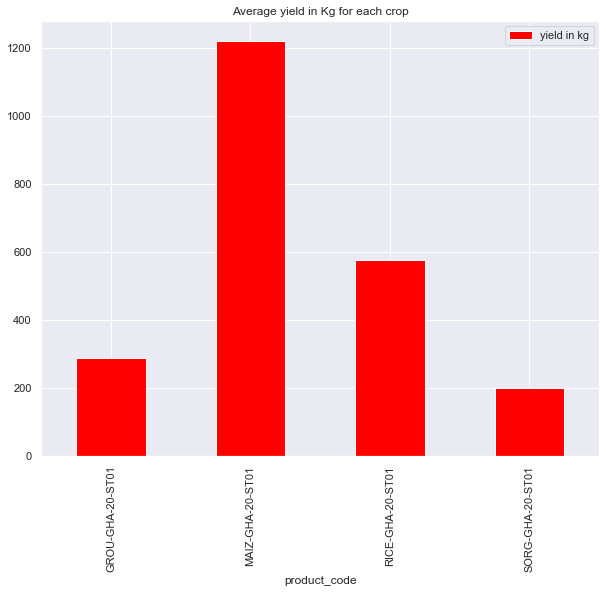

In [258]:
full_table[['product_code','yield in kg']].groupby('product_code').agg(np.mean).reset_index().plot(kind='bar',x='product_code',y='yield in kg',color='red',figsize=(10,8),title='Average yield in Kg for each crop').get_figure().savefig('product_yield.png')

### Maize had the highest yield this season followed by rice. Most farmers planted Maize this season

### Average yield per region

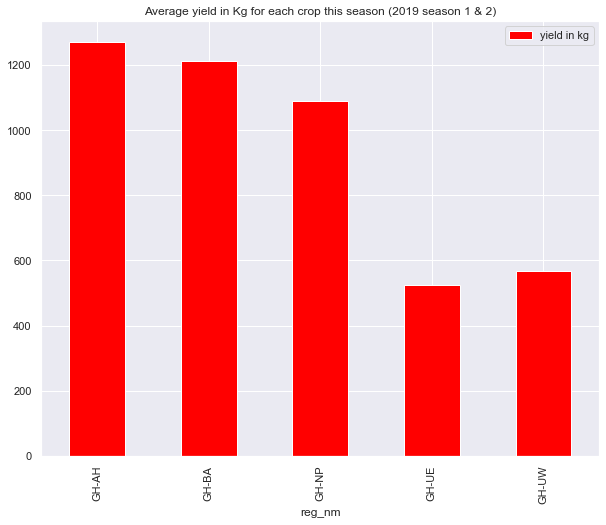

In [246]:
full_table[['reg_nm','yield in kg']].groupby('reg_nm').agg(np.mean).reset_index().plot(kind='bar',x='reg_nm',y='yield in kg',color='red',figsize=(10,8),title='Average yield in Kg for each crop this season (2019 season 1 & 2)')

#### GH-AH has a higher average yield compared to other regions

### Average yield per district 

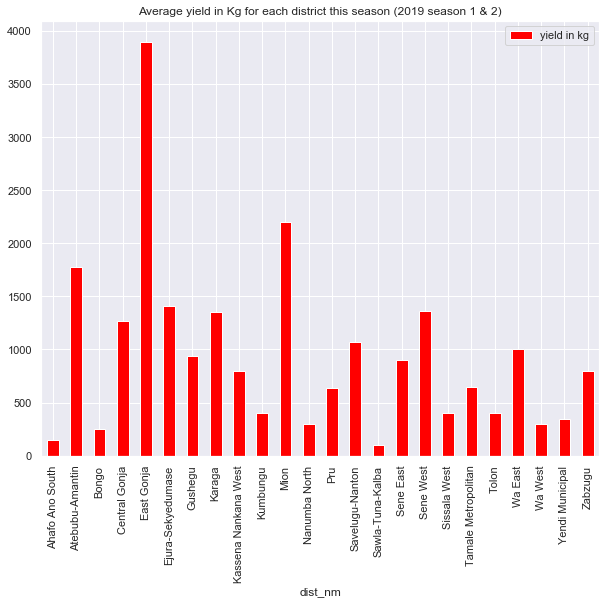

In [247]:
full_table[['dist_nm','yield in kg']].groupby('dist_nm').agg(np.mean).reset_index().plot(kind='bar',x='dist_nm',y='yield in kg',color='red',figsize=(10,8),title='Average yield in Kg for each district this season (2019 season 1 & 2)')

#### East Gonja Had the highest average yield

### Average yield per farmer

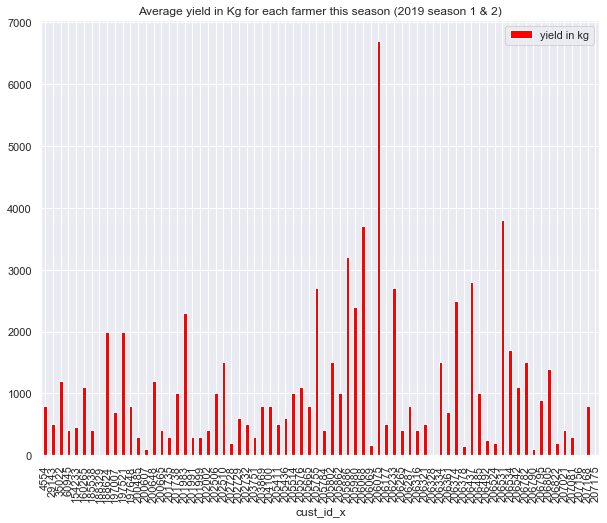

In [248]:
full_table[['cust_id_x','yield in kg']].groupby('cust_id_x').agg(np.mean).reset_index().plot(kind='bar',x='cust_id_x',y='yield in kg',color='red',figsize=(10,8),title='Average yield in Kg for each farmer this season (2019 season 1 & 2)')

### Maize Performance good and bad

According to TradingEconomics a high yield of maize is about 1800kg per hectar and a poor yield is about about 1300kg per hectar

https://tradingeconomics.com/ghana/maize-yield-kg-per-hectare-wb-data.html

Using our dataset Yield per hectar cannot be derived as the farm size is not specified for most records

### Do other factors seem to influence crop yields?
Lets explore :D

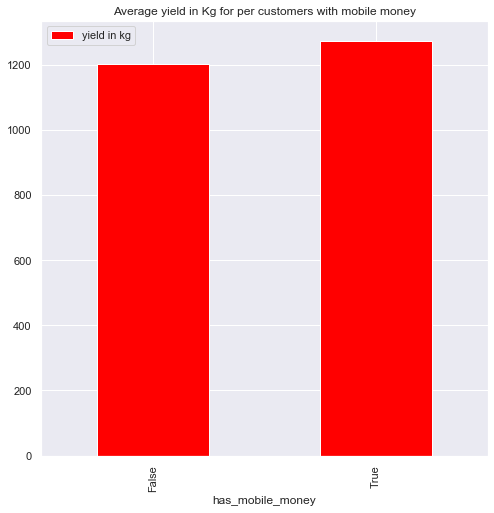

In [250]:
full_table[['has_mobile_money','yield in kg']].groupby('has_mobile_money').agg(np.mean).reset_index().plot(kind='bar',x='has_mobile_money',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for per customers with mobile money')

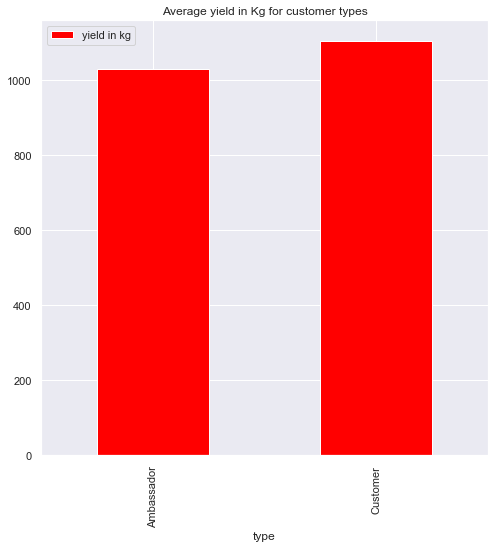

In [252]:
full_table[['type','yield in kg']].groupby('type').agg(np.mean).reset_index().plot(kind='bar',x='type',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for customer types')

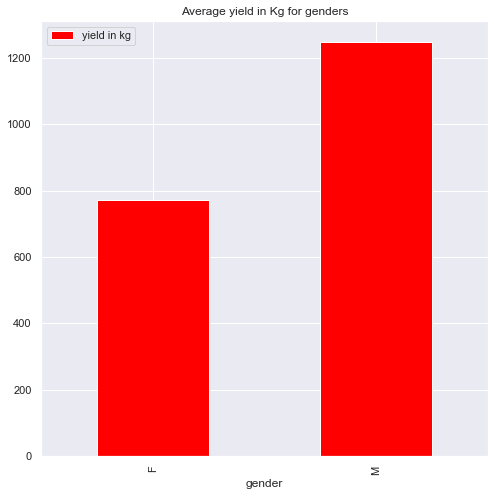

In [261]:
full_table[['gender','yield in kg']].groupby('gender').agg(np.mean).reset_index().plot(kind='bar',x='gender',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for genders') 

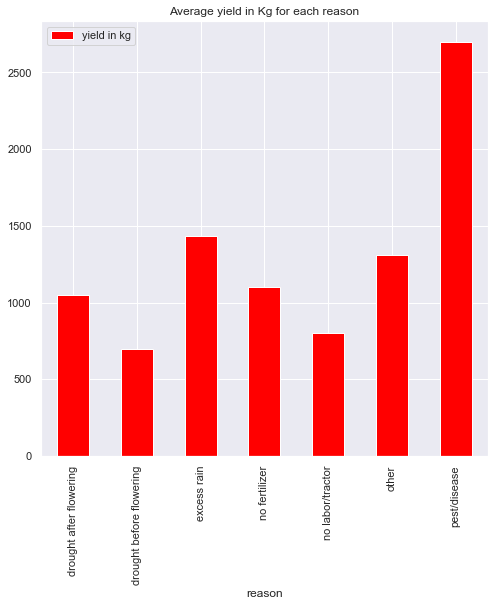

In [254]:
full_table[['reason','yield in kg']].groupby('reason').agg(np.mean).reset_index().plot(kind='bar',x='reason',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for each reason') 

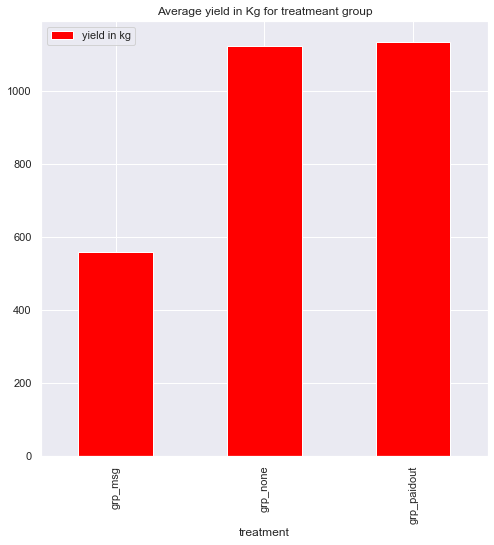

In [255]:
full_table[['treatment','yield in kg']].groupby('treatment').agg(np.mean).reset_index().plot(kind='bar',x='treatment',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for treatmeant group') 

In [88]:
# Function to populate a column with boolean if fertilizer is used
def use_fert(m):
    if m>0:
        return 'Yes'
    else:
        return 'No'

In [90]:
full_table['used fertilizer'] = full_table['fert_bags'].apply(use_fert)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg,used fertilizer
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,164.0,No
1,206068,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,1.888410,48871.0,0.152239,8.0,grp_none,Faa-Ilatu,2020-01-08,connected,4.0,37.0,10.0,very poor,none,other,37.0,0.0,0.0,NaN,NaN,206068.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,10.0,1.888410,2019-06-29,2019-06-29,2019-08-19,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,3700.0,Yes
2,206287,2019-01-29,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.832615,49530.0,0.152239,8.0,grp_none,Alhassan,2019-12-24,connected,6.0,8.0,0.0,poor,1/4,no fertilizer,21.0,0.0,0.0,Pets affected small part of the farm.,NaN,206287.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2019-01-29,10.0,1.888410,2019-07-06,2019-07-06,2019-08-01,2467,0.0,0.000000,NaN,Jukuku,1970-01-01T05:04:09Z,NaN,NaN,NaN,NaN,254.557668,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.020787,9.140628,800.0,No
3,206316,2019-02-22,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,NaN,False,Customer,1.888410,49726.0,0.155080,7.0,grp_msg,Faa-Ilatu,2020-01-08,connected,2.0,4.0,4.0,poor,1/4,drought after flowering,20.0,0.0,0.0,NaN,NaN,206316.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2019-03-21,10.0,1.888410,2019-06-30,2019-06-30,2019-08-30,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,400.0,Yes
4,206075,2018-12-18,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,4.721025,48885.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-31,connected,10.0,67.0,0.0,average,1/2,drought after flowering,115.0,0.0,0.0,NaN,NaN,206075.0,paid out,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,20.0,3.776820,2019-05-10,2019-05-10,2019-07-23,528,40.0,7.553640,True,Takpili,1970-01-01T04:58:45Z,NaN,NaN,NaN,NaN,115.948374,NaN,GH(N),Ghana,GH-NP,5,East Gonja,-0.578411,9.300931,6700.0,No


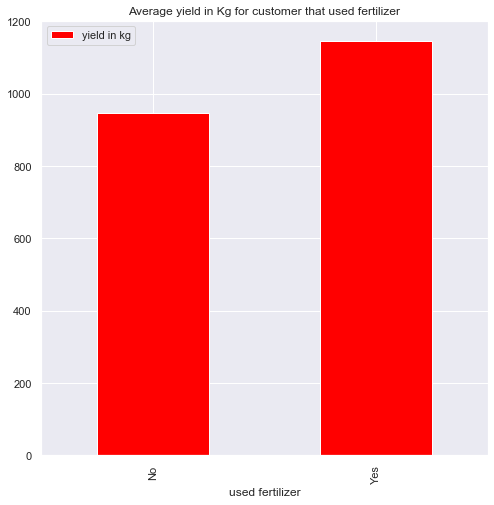

In [256]:
full_table[['used fertilizer','yield in kg']].groupby('used fertilizer').agg(np.mean).reset_index().plot(kind='bar',x='used fertilizer',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for customer that used fertilizer')

### Number of customers that received insurance payout after poor yield

In [74]:
full_table.head(1)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,164.0


In [75]:
full_table.status.value_counts()

expired               33
paid out              29
paid out (in part)     6
pending                3
payout due             1
Name: status, dtype: int64

In [77]:
full_table.yield_rate.value_counts()

poor         27
very poor    21
average      11
good         10
very good     1
Name: yield_rate, dtype: int64

In [79]:
bad_yield = full_table[(full_table['yield_rate']=='poor')|(full_table['yield_rate']=='very poor')]
bad_yield.head(2)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,164.0
1,206068,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,1.888410,48871.0,0.152239,8.0,grp_none,Faa-Ilatu,2020-01-08,connected,4.0,37.0,10.0,very poor,none,other,37.0,0.0,0.0,NaN,NaN,206068.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,10.0,1.888410,2019-06-29,2019-06-29,2019-08-19,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,3700.0


In [84]:
bad_yield.shape

(48, 61)

In [80]:
pay_status = ['paid out','paid out (in part)','payout due','payout initiated']

In [274]:
good_yield = full_table[(full_table['yield_rate']=='average')|(full_table['yield_rate']=='good')|(full_table['yield_rate']=='very good')]

In [277]:
good_yield[~good_yield['status'].isin(pay_status)].shape

(13, 63)

In [278]:
bad_yield[~bad_yield['status'].isin(pay_status)].shape

(22, 61)

##### In the 2019 season 26 customers had bad yield and received a payout

### Can we say that districts with poorer (or better) harvests received higher (or lower) insurance payout amounts?

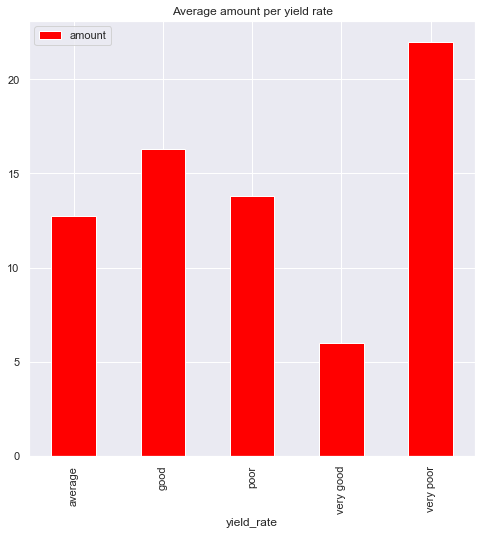

In [265]:
full_table[['yield_rate','amount']].groupby('yield_rate').agg(np.mean).reset_index().plot(kind= 'bar',x='yield_rate',y='amount',figsize=(8,8),title='Average amount per yield rate',color='red')

Text(0, 0.5, 'amount')

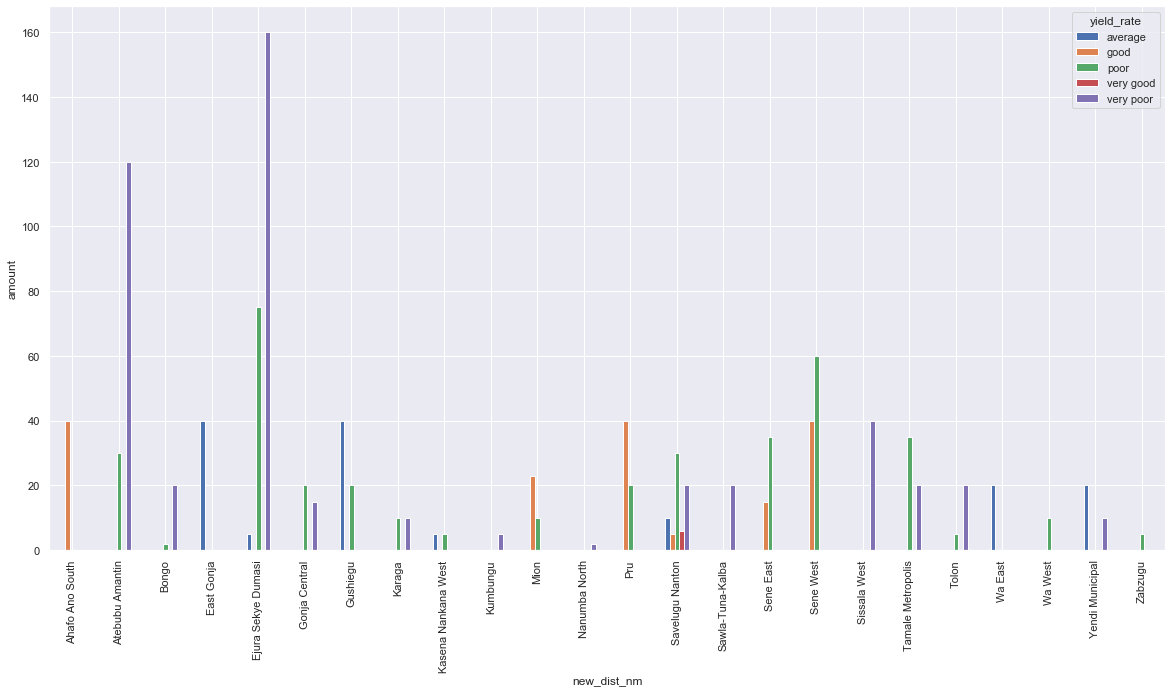

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()
pd.pivot_table(full_table, index= 'new_dist_nm', columns= 'yield_rate', values= "amount",aggfunc=np.sum).plot(kind= 'bar',figsize=(20,10))
plt.ylabel("amount")

### From the chart above the all regions with poor yield rate received high amounts compared to other yield rates

### Can we trust the quality of our Y2019 sampled data?

Yes the quality can be trusted however more information such as farm size should be inputted to get more quality insight

In [219]:
regions_poverty[['new_dist_nm','yield_rate','amount']].groupby(['new_dist_nm','yield_rate']).agg(np.mean).reset_index() 

,new_dist_nm,yield_rate,amount
0,Ahafo Ano South,good,20.0
1,Bongo,poor,2.0
2,Bongo,very poor,20.0
3,East Gonja,average,20.0
4,Karaga,poor,10.0
5,Karaga,very poor,10.0
6,Mion,good,23.0
7,Mion,poor,10.0
8,Nanumba North,very poor,2.0
9,Pru,good,20.0


In [76]:
# full_table[(full_table['status']=='paid out') | (full_table['status']=='paid out (in part)')|(full_table['status']=='payout due')].shape
full

(36, 61)

In [72]:
payout = testcryield[testcryield['call_status']=='connected']
payout.shape

(216, 19)

In [73]:
payout.head(1)

,cust_id,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count
0,202802,50339,0.5,1,grp_msg,Hurmat,2019-12-31,connected,3.0,6.0,8.0,very poor,3/4,drought before flowering,45.0,6.0,130.0,"Four days after the fertilizer application, th...",216.0


## Using external data source to get poverty rating and check yield

#### Data from http://www2.statsghana.gov.gh/docfiles/publications/GLSS7/Poverty%20Profile%20Report_2005%20-%202017.pdf

In [98]:
region1 = aa[2].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region1.head(10)

,Unnamed: 0,Unnamed: 1,Poverty,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Estimated
2,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Western Region,"2,307,385",19.2,0.0040,5.5,0.0018,2.3,0.0010,41.2,"443,479"
6,Jomoro,"145,480",30.7,0.0137,9.4,0.0055,4.1,0.0029,38.2,"44,662"
8,Ellembelle,"85,338",19.9,0.0118,5.4,0.0039,2.2,0.0018,36.7,"16,957"
10,Nzema East,"59,250",32.2,0.0172,9.5,0.0089,4.0,0.0055,44.5,"19,067"
12,Ahanta West,"103,710",19.3,0.0094,5.2,0.0034,2.2,0.0017,33.7,"19,975"
14,Metropolis,"532,516",12.9,0.0052,3.9,0.0023,1.7,0.0013,43.1,"68,482"
15,Kwesimintsim,"222,282",9.4,0.0060,2.7,0.0022,1.2,0.0012,43.5,"20,806"
16,Takoradi,"88,075",8.7,0.0053,3.2,0.0021,1.7,0.0014,42.5,"7,680"
17,Sekondi,"66,999",22.9,0.0130,7.7,0.0057,3.7,0.0032,41.1,"15,329"


In [101]:
region1 = region1.rename(columns=region1.iloc[0]).drop(region1.index[0])

In [127]:
region1.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Western Region,"2,307,385",19.2,0.0040,5.5,0.0018,2.3,0.0010,41.2,"443,479"


In [102]:
region2 = aa[3].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region2 = region2.rename(columns=region2.iloc[0]).drop(region2.index[0])
region2.head(2)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Central,"2,113,763",19.6,0.0072,5.7,0.003,2.4,0.0016,42.0,"415,143"
6,Municipal,"139,053",18.6,0.0183,5.0,0.0069,2.1,0.0034,37.2,"25,836"


In [103]:
region3 = aa[4].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region3 = region3.rename(columns=region3.iloc[0]).drop(region3.index[0])
region3.head(1)

,Region/District/ Sub-district,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Greater Accra Region,"3,888,237",6.6,0.0015,1.8,0.0005,0.8,0.0002,37.6,"257,401"


In [105]:
region4 = aa[5].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region4 = region4.rename(columns=region4.iloc[0]).drop(region4.index[0])
region4.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
3,Volta Region,"2,086,557",33.3,0.0028,11.8,0.0018,5.7,0.0012,43.7,"694,615"


In [107]:
region5 = aa[6].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region5 = region5.rename(columns=region5.iloc[0]).drop(region5.index[0])
region5.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Eastern Region,"2,574,543",22.0,0.0097,6.1,0.0041,2.5,0.0022,37.9,"566,399"


In [110]:
region6 = aa[7].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region6 = region6.rename(columns=region6.iloc[0]).drop(region6.index[0])
region6.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
3,Ashanti,"4,671,948",13.6,0.0035,3.8,0.0015,1.6,0.0008,37.3,"636,787"


In [112]:
region7 = aa[8].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region7 = region7.rename(columns=region7.iloc[0]).drop(region7.index[0])
region7.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Brong Ahafo,"2,265,434",28.6,0.0036,9.5,0.0016,4.4,0.0009,49.4,"648,367"


In [114]:
region8 = aa[9].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region8 = region8.rename(columns=region8.iloc[0]).drop(region8.index[0])
region8.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Northern Region,"2,445,061",44.2,0.0062,15.5,0.0035,7.4,0.0023,38.8,"1,079,494"


In [115]:
region9 = aa[10].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region9 = region9.rename(columns=region9.iloc[0]).drop(region9.index[0])
region9.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Upper East,"1,034,688",45.9,0.0137,22.2,0.0118,13.6,0.0097,57.6,"474,818"


In [117]:
region10 = aa[11].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
region10 = region10.rename(columns=region10.iloc[0]).drop(region10.index[0])
region10.head(1)

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Upper West,"688,328",69.4,0.0102,35.8,0.0087,22.5,0.0074,49.7,"477,631"


In [120]:
poverty_region = pd.concat([region1,region2])

In [139]:
region10.shape

(12, 10)

In [140]:
regions =[region2,region4,region5,region6,region7,region8,region9,region10]

In [141]:
povert_regions1 = pd.concat(regions)

In [143]:
povert_regions1.head()

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons
4,Central,"2,113,763",19.6,0.0072,5.7,0.003,2.4,0.0016,42.0,"415,143"
6,Municipal,"139,053",18.6,0.0183,5.0,0.0069,2.1,0.0034,37.2,"25,836"
8,Cape Coast Metropolis,"140,405",2.6,0.0063,0.7,0.0019,0.3,0.0009,37.3,"3,580"
9,Cape Coast South,"81,560",2.7,0.0076,0.7,0.0021,0.3,0.0009,37.9,"2,227"
10,Cape Coast North,"58,845",2.3,0.0059,0.7,0.0020,0.3,0.0011,36.3,"1,348"


In [150]:
#Calculate poverty rate
def poverty_rate(m):
    if float(m) < 10:
        return 'Low'
    elif (float(m)>10 and float(m)<25):
        return 'Medium'
    elif (float(m)>25 and float(m)<40):
        return 'High'
    elif (float(m)>40 and float(m)<50):
        return 'Very High'
    else:
        return 'Severe'

In [151]:
povert_regions1['rating'] = povert_regions1['(P0)'].apply(poverty_rate)

In [152]:
povert_regions1.head()

,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons,rating
4,Central,"2,113,763",19.6,0.0072,5.7,0.003,2.4,0.0016,42.0,"415,143",Medium
6,Municipal,"139,053",18.6,0.0183,5.0,0.0069,2.1,0.0034,37.2,"25,836",Medium
8,Cape Coast Metropolis,"140,405",2.6,0.0063,0.7,0.0019,0.3,0.0009,37.3,"3,580",Low
9,Cape Coast South,"81,560",2.7,0.0076,0.7,0.0021,0.3,0.0009,37.9,"2,227",Low
10,Cape Coast North,"58,845",2.3,0.0059,0.7,0.0020,0.3,0.0011,36.3,"1,348",Low


In [194]:
povert_regions1[povert_regions1['Region/District'].str.contains('Wa')]
# povert_regions1[povert_regions1['Region/District'].str.contains('Gushegu')]


,Region/District,Population,(P0),error,(P1),error,(P2),error,coefficient,persons,rating
6,Wa West,"80,382",92.4,0.0140,59.0,0.0261,41.8,0.0266,42.2,"74,297",Severe
8,Wa Municipal,"102,264",35.5,0.0360,13.8,0.0179,7.3,0.0107,45.1,"36,253",High
10,Wa East,"71,120",83.8,0.0264,46.1,0.0311,29.9,0.0273,41.5,"59,577",Severe


,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg,used fertilizer
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,164.0,No
1,206068,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,1.888410,48871.0,0.152239,8.0,grp_none,Faa-Ilatu,2020-01-08,connected,4.0,37.0,10.0,very poor,none,other,37.0,0.0,0.0,NaN,NaN,206068.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,10.0,1.888410,2019-06-29,2019-06-29,2019-08-19,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,3700.0,Yes
2,206287,2019-01-29,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.832615,49530.0,0.152239,8.0,grp_none,Alhassan,2019-12-24,connected,6.0,8.0,0.0,poor,1/4,no fertilizer,21.0,0.0,0.0,Pets affected small part of the farm.,NaN,206287.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2019-01-29,10.0,1.888410,2019-07-06,2019-07-06,2019-08-01,2467,0.0,0.000000,NaN,Jukuku,1970-01-01T05:04:09Z,NaN,NaN,NaN,NaN,254.557668,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.020787,9.140628,800.0,No
3,206316,2019-02-22,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,NaN,False,Customer,1.888410,49726.0,0.155080,7.0,grp_msg,Faa-Ilatu,2020-01-08,connected,2.0,4.0,4.0,poor,1/4,drought after flowering,20.0,0.0,0.0,NaN,NaN,206316.0,expired,Y2019S1,MAIZ-GHA-20-ST01,2019-03-21,10.0,1.888410,2019-06-30,2019-06-30,2019-08-30,2820,0.0,0.000000,NaN,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,400.0,Yes
4,206075,2018-12-18,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,4.721025,48885.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-31,connected,10.0,67.0,0.0,average,1/2,drought after flowering,115.0,0.0,0.0,NaN,NaN,206075.0,paid out,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,20.0,3.776820,2019-05-10,2019-05-10,2019-07-23,528,40.0,7.553640,True,Takpili,1970-01-01T04:58:45Z,NaN,NaN,NaN,NaN,115.948374,NaN,GH(N),Ghana,GH-NP,5,East Gonja,-0.578411,9.300931,6700.0,No


In [199]:
names = { 'Atebubu-Amantin':'Atebubu Amantin',
                                      'Savelugu-Nanton':'Savelugu Nanton',
                                      'Ejura-Sekyedumase':'Ejura Sekye Dumasi',
                                      'Gushegu':'Gushiegu',
                                      'Ejura Sekyedumase':'Ejura-Sekyedumasi',
                                      'Gushegu':'Gushiegu',
                                      'Central Gonja':'Gonja Central',
                                      'Tamale Metropolitan':'Tamale Metropolis',
                                       'Kassena Nankana West':'Kasena Nankana West',
                                       'Ahafo Ano South':'Ahafo Ano South',
                                       'Sawla Tuna Kalba':'Sawla/Tuna/Kalba',
                                       'Talensi':'Talensi-Nabdam'}

In [204]:
full_table['new_dist_nm'] = full_table.dist_nm.replace(to_replace=names)

In [207]:
full_table.head(1)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg,used fertilizer,new_dist_nm
0,206069,2018-12-14,M,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,2.454933,48872.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-24,connected,2.0,2.0,0.0,very poor,3/4,drought after flowering,10.0,0.0,0.0,NaN,NaN,206069.0,paid out (in part),Y2019S1,GROU-GHA-20-ST01,2018-12-14,5.0,0.944205,2019-05-26,2019-05-26,2019-08-20,2820,8.0,1.510728,False,Ntereso,1970-01-01T04:59:09Z,NaN,NaN,NaN,NaN,43.811112,NaN,GH(N),Ghana,GH-NP,3,Central Gonja,-1.205985,9.129283,164.0,No,Gonja Central


In [156]:
poverty_ratings = povert_regions1[['Region/District','rating']]

In [208]:
region_names = list(full_table['new_dist_nm'])

In [209]:
full_table['dist_nm'].value_counts()

Ejura-Sekyedumase       9
Savelugu-Nanton         9
Gushegu                 5
Sene West               5
Atebubu-Amantin         5
Sene East               4
Central Gonja           4
Tamale Metropolitan     4
Pru                     3
Tolon                   3
Mion                    2
Karaga                  2
East Gonja              2
Kassena Nankana West    2
Bongo                   2
Ahafo Ano South         2
Yendi Municipal         2
Wa West                 1
Sissala West            1
Wa East                 1
Kumbungu                1
Sawla-Tuna-Kalba        1
Zabzugu                 1
Nanumba North           1
Name: dist_nm, dtype: int64

In [211]:
available_regions = poverty_ratings[poverty_ratings['dist_nm'].isin(region_names)]

In [177]:
available_regions[available_regions['Region']]

,Region/District,rating
28,Ahafo Ano South,Medium
42,Sene West,Very High
44,Pru,Very High
58,Sene East,High
8,Sawla-Tuna-Kalba,Severe
14,East Gonja,Severe
20,Nanumba North,High
22,Zabzugu,High
24,Yendi Municipal,High
30,Tolon,Very High


In [212]:
poverty_ratings.head(1)

,dist_nm,rating
4,Central,Medium


In [164]:
poverty_ratings = poverty_ratings.rename(columns={"Region/District": "dist_nm"})

In [213]:
regions_poverty = pd.merge(full_table, poverty_ratings, on='dist_nm')

In [282]:
regions_poverty.head(1)

,cust_id_x,date_reg_x,gender,literacy,farm_size,num_parcels,cht_season,cht_channel,cht_phone,has_mobile_money,ussd_created,type,amount_usd,cntr_id,weight,strata,treatment,caller,date_called,call_status,planted_acres,yield_bags,fert_bags,yield_rate,yield_lost,reason,yield_max_bags,sold_bags,sold_price,notes,call_count,cust_id_y,status,season,product_code,date_issued,amount,amount_usd_x,date_planted,date_planted_imp,date_planted_in,loc_id,payout,payout_usd,mm_paid,loc_nm,date_reg_y,cust_N,visit_N,is_female,channel_zm,amount_usd_y,ca_nm,iso3,country,reg_nm,dist_id,dist_nm,X,Y,yield in kg,used fertilizer,new_dist_nm,rating
0,206075,2018-12-18,NaN,NaN,NaN,NaN,Y2019S1,CALL CENTER,True,True,False,Customer,4.721025,48885.0,0.151436,9.0,grp_paidout,Faa-Ilatu,2019-12-31,connected,10.0,67.0,0.0,average,1/2,drought after flowering,115.0,0.0,0.0,NaN,NaN,206075.0,paid out,Y2019S1,MAIZ-GHA-20-ST01,2018-12-14,20.0,3.77682,2019-05-10,2019-05-10,2019-07-23,528,40.0,7.55364,True,Takpili,1970-01-01T04:58:45Z,NaN,NaN,NaN,NaN,115.948374,NaN,GH(N),Ghana,GH-NP,5,East Gonja,-0.578411,9.300931,6700.0,No,East Gonja,Severe


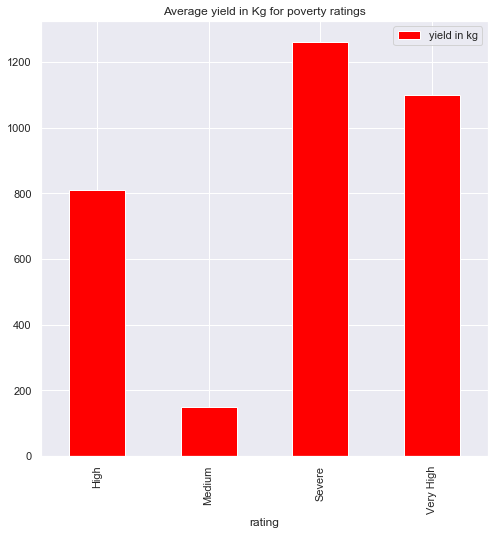

In [286]:
regions_poverty[['rating','yield in kg']].groupby('rating').agg(np.mean).reset_index().plot(kind='bar',x='rating',y='yield in kg',color='red',figsize=(8,8),title='Average yield in Kg for poverty ratings')

In [216]:
full_table.dist_nm.value_counts()

Ejura-Sekyedumase       9
Savelugu-Nanton         9
Gushegu                 5
Sene West               5
Atebubu-Amantin         5
Sene East               4
Central Gonja           4
Tamale Metropolitan     4
Pru                     3
Tolon                   3
Mion                    2
Karaga                  2
East Gonja              2
Kassena Nankana West    2
Bongo                   2
Ahafo Ano South         2
Yendi Municipal         2
Wa West                 1
Sissala West            1
Wa East                 1
Kumbungu                1
Sawla-Tuna-Kalba        1
Zabzugu                 1
Nanumba North           1
Name: dist_nm, dtype: int64